# 毕业论文`GRAD`
## 计算贡献值

---
*@author: Evan*\
*@date: 2023-12-19*

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from matplotlib import rcParams
config = {
    "font.family":'Times New Roman',
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)

import sys
sys.path.append('../../../src/')
from namelist import *

# silence the warning note
import warnings
warnings.filterwarnings("ignore")

## 时间序列

In [2]:
inputpath = 'D:/data/Graduation/Contribution/contribution_hours_Seasonally/'
df_summer = pd.read_excel(inputpath + 'summer.xlsx',index_col=0)
df_autumn = pd.read_excel(inputpath + 'autumn.xlsx',index_col=0)
mda8_summer = df_summer.rolling(8).mean().resample('D').max()
mda8_autumn = df_autumn.rolling(8).mean().resample('D').max()

In [3]:
df_summer.columns

Index(['sim_2019', 'obs_2019', 'sim_2021', 'obs_2021', 'sim_2022', 'obs_2022'], dtype='object')

In [4]:
obs_summer = pd.concat([df_summer['obs_2019'],df_summer['obs_2021'],df_summer['obs_2022']]).values
sim_summer = pd.concat([df_summer['sim_2019'],df_summer['sim_2021'],df_summer['sim_2022']]).values
obs_autumn = pd.concat([df_autumn['obs_2019'],df_autumn['obs_2021'],df_autumn['obs_2022']]).values
sim_autumn = pd.concat([df_autumn['sim_2019'],df_autumn['sim_2021'],df_autumn['sim_2022']]).values

obs_mda8_summer = pd.concat([mda8_summer['obs_2019'],mda8_summer['obs_2021'],mda8_summer['obs_2022']]).values
sim_mda8_summer = pd.concat([mda8_summer['sim_2019'],mda8_summer['sim_2021'],mda8_summer['sim_2022']]).values
obs_mda8_autumn = pd.concat([mda8_autumn['obs_2019'],mda8_autumn['obs_2021'],mda8_autumn['obs_2022']]).values
sim_mda8_autumn = pd.concat([mda8_autumn['sim_2019'],mda8_autumn['sim_2021'],mda8_autumn['sim_2022']]).values

In [37]:
lr = pd.read_excel('D:/data/Graduation/Contribution/lr_results_Seasonally.xlsx',index_col=0)
lr

,original,lr_by_summer,lr_by_autumn
obs_summer,94.603116,NaN,NaN
obs_autumn,139.694575,NaN,NaN
sim_summer,155.885196,94.338172,NaN
sim_autumn,159.261713,NaN,137.91043
sen_autumn,160.560472,97.124703,NaN


In [38]:
avg_mda8_summer = lr['original']['obs_summer']
avg_mda8_autumn = lr['original']['obs_autumn']

In [18]:
obs = np.concatenate([obs_summer,obs_autumn])
obs_mda8 = np.concatenate([obs_mda8_summer,obs_mda8_autumn])

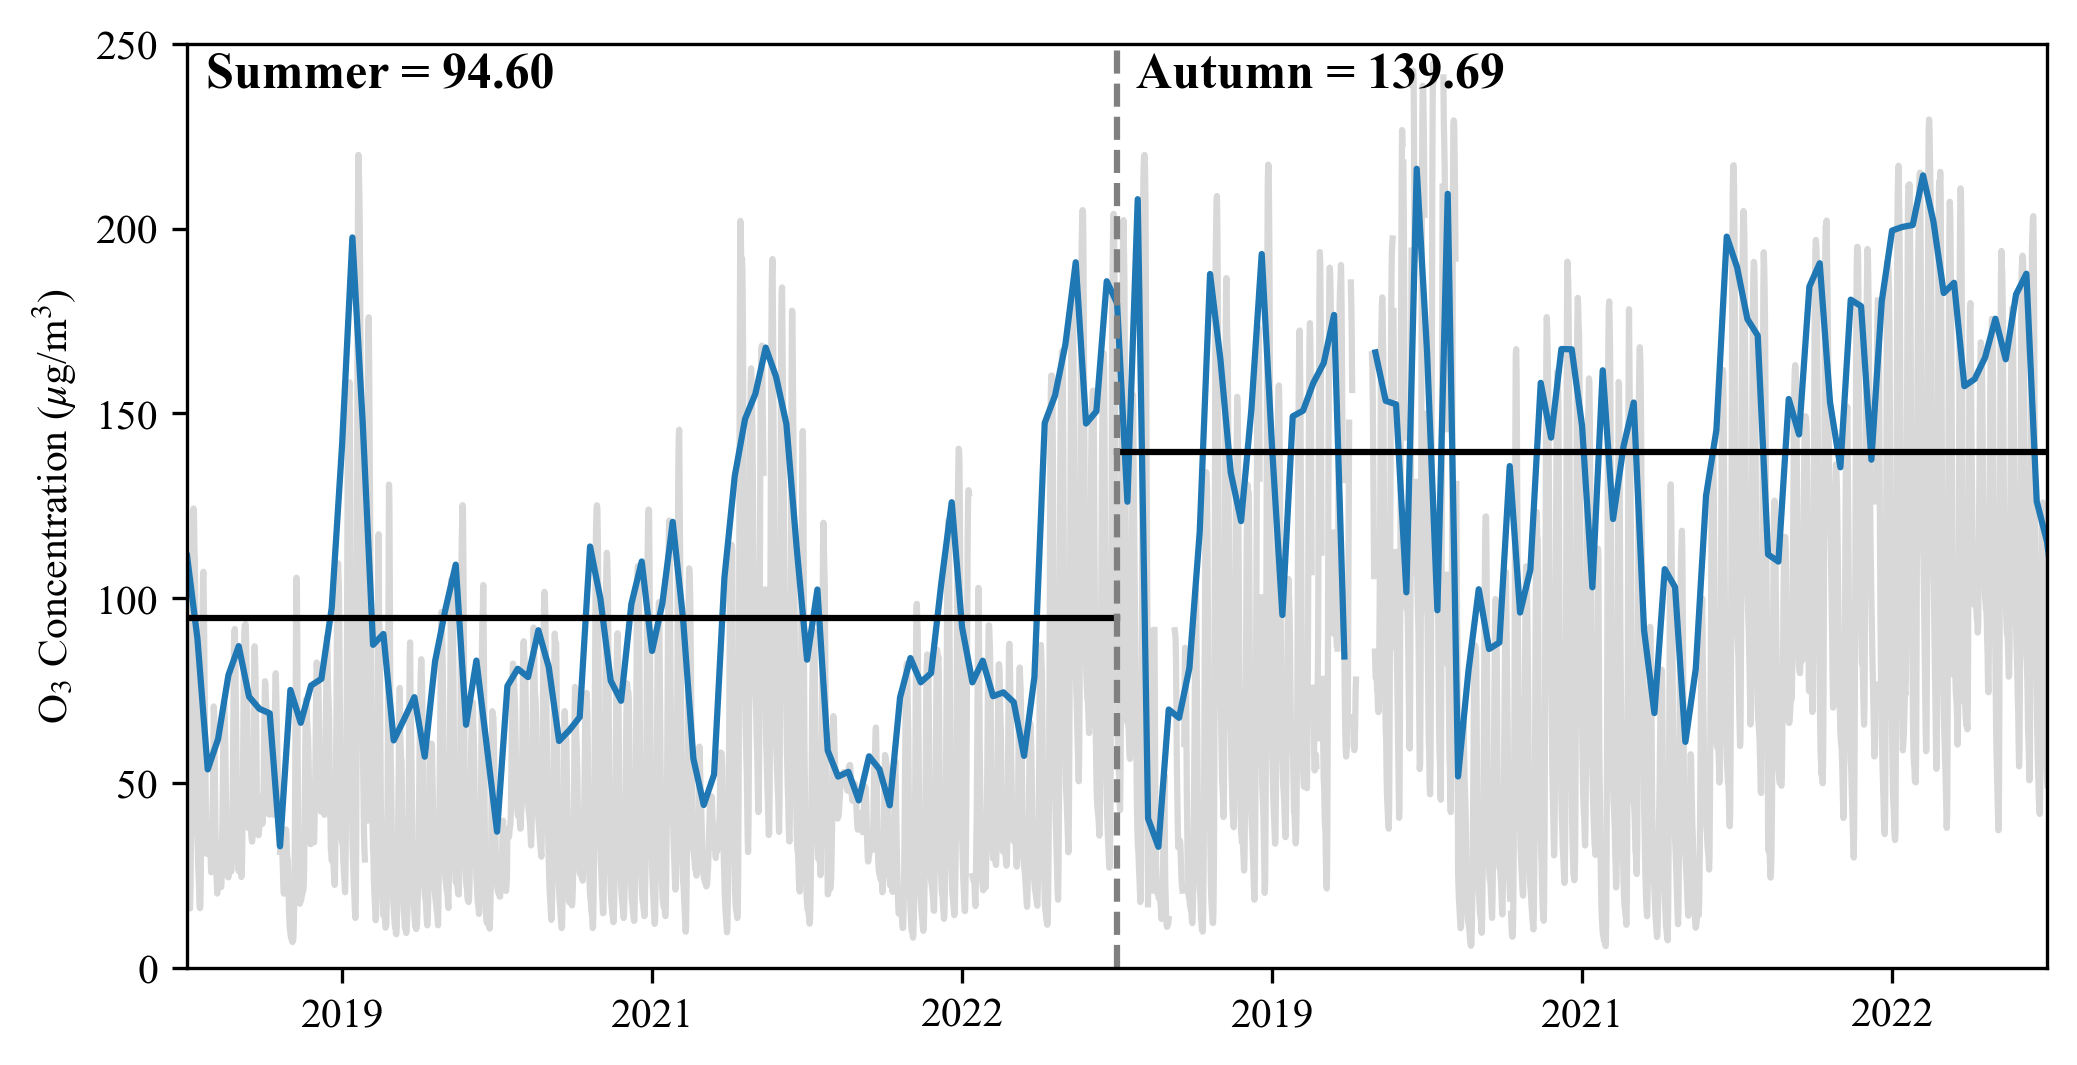

In [39]:
hstep = np.arange(0,4392,1)
dstep = np.arange(0,4392,24)

fig = plt.figure(figsize=(8, 4),dpi=300)
ax = fig.subplots(1,1)

ax.plot(hstep,obs,color='gray',alpha=0.3)
ax.plot(dstep,obs_mda8,)

ax.axhline(y=avg_mda8_summer,xmin=0,xmax=0.5,color='k')
ax.axhline(y=avg_mda8_autumn,xmin=0.5,xmax=1,color='k')
ax.axvline(x=2160,linestyle='--',color='gray')

textdict = {'weight':'bold','size':12,'ha':'left','va':'top'}
ax.text(0.01,0.99,f'Summer = {avg_mda8_summer:.2f}',transform=ax.transAxes,**textdict)
ax.text(0.51,0.99,f'Autumn = {avg_mda8_autumn:.2f}',transform=ax.transAxes,**textdict)

ax.set_xticks(np.arange(0,4320,24*30)+24*30/2)
ax.set_xticklabels([2019,2021,2022,2019,2021,2022])
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax.set_xlim(0,4320)
ax.set_ylim(0,250)
plt.show()

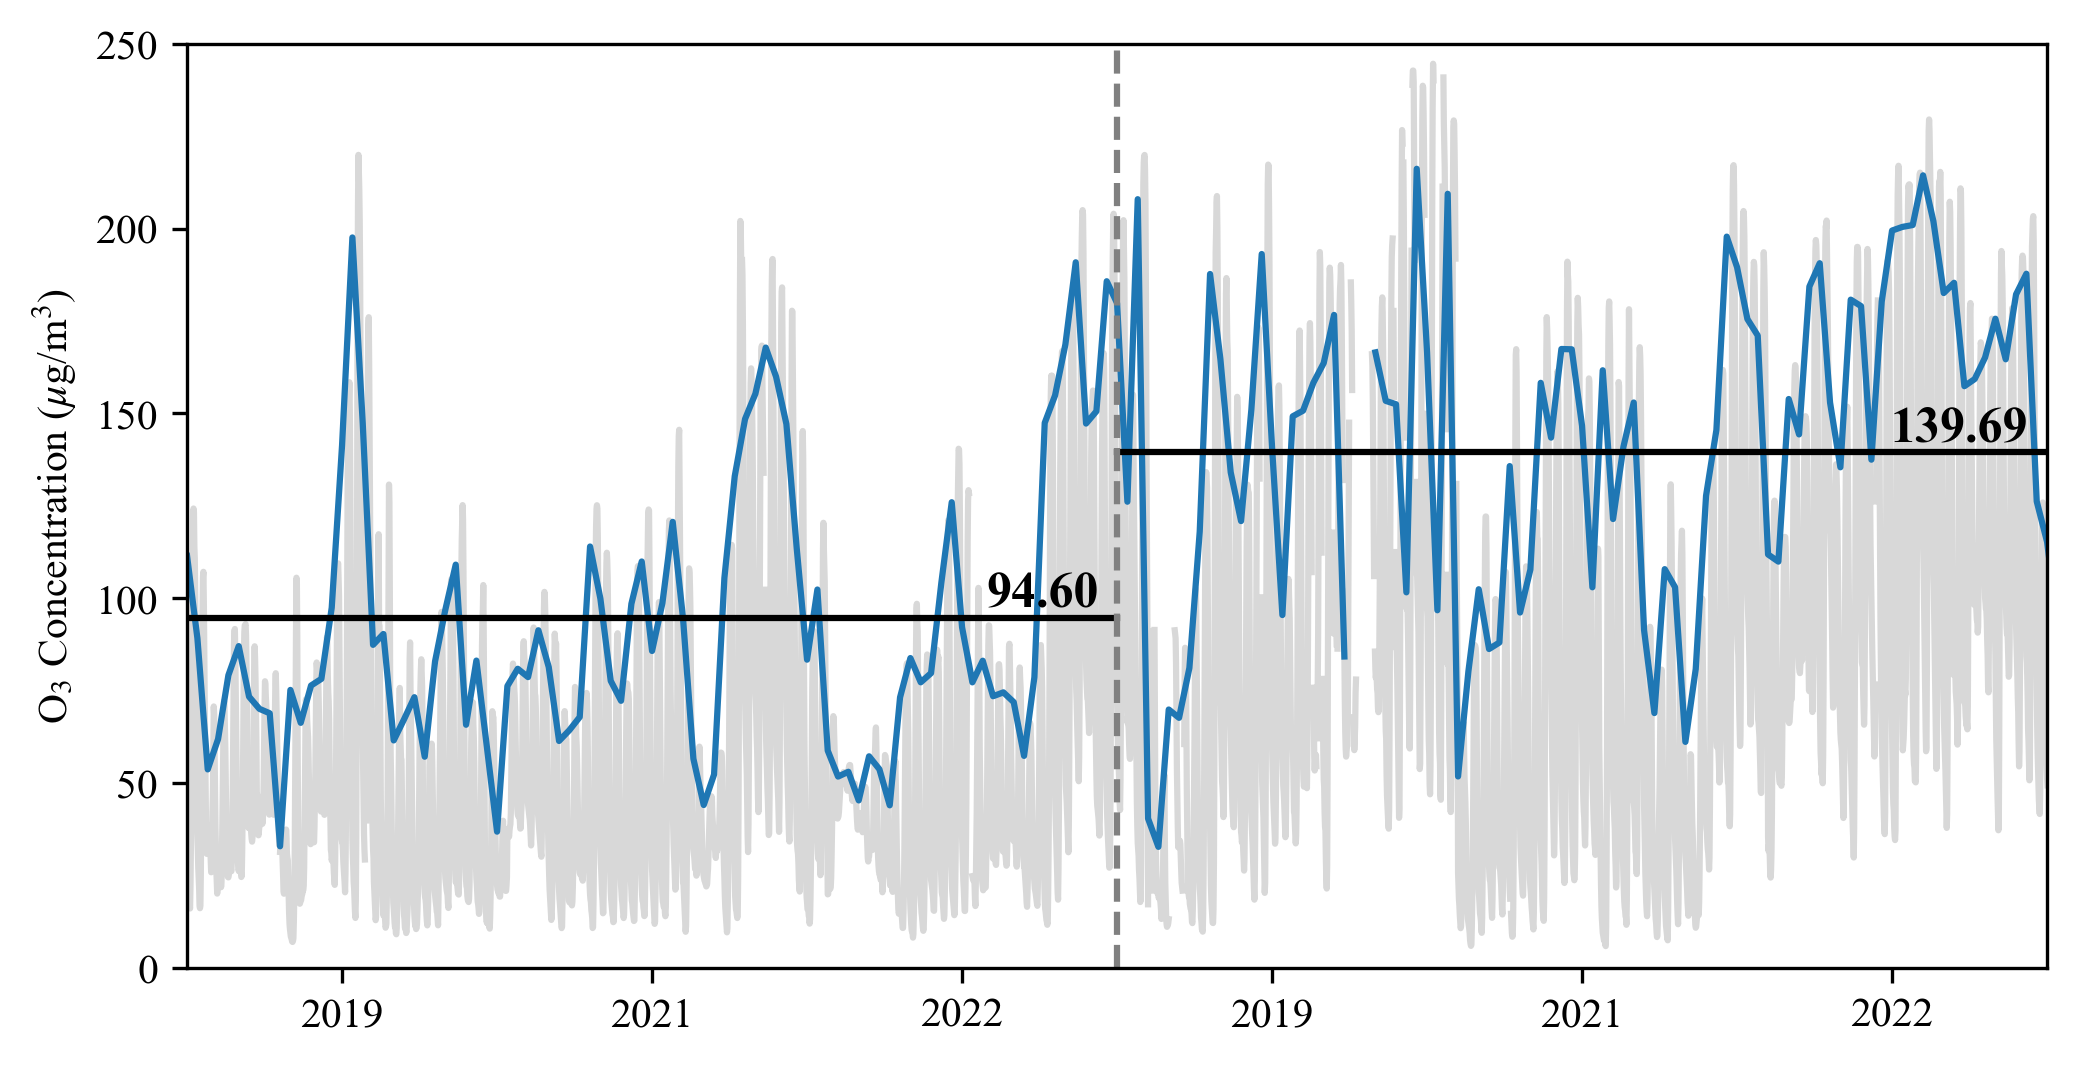

In [40]:
hstep = np.arange(0,4392,1)
dstep = np.arange(0,4392,24)

fig = plt.figure(figsize=(8, 4),dpi=300)
ax = fig.subplots(1,1)

ax.plot(hstep,obs,color='gray',alpha=0.3)
ax.plot(dstep,obs_mda8,)

ax.axhline(y=avg_mda8_summer,xmin=0,xmax=0.5,color='k')
ax.axhline(y=avg_mda8_autumn,xmin=0.5,xmax=1,color='k')
ax.axvline(x=2160,linestyle='--',color='gray')

textdict = {'weight':'bold','size':12,'ha':'right','va':'bottom'}
ax.text(0.49,avg_mda8_summer/250,f'{avg_mda8_summer:.2f}',transform=ax.transAxes,**textdict)
ax.text(0.99,avg_mda8_autumn/250,f'{avg_mda8_autumn:.2f}',transform=ax.transAxes,**textdict)

ax.set_xticks(np.arange(0,4320,24*30)+24*30/2)
ax.set_xticklabels([2019,2021,2022,2019,2021,2022])
ax.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax.set_xlim(0,4320)
ax.set_ylim(0,250)
plt.show()

## 柱状图

In [30]:
lr = pd.read_excel('D:/data/Graduation/Contribution/lr_results_Seasonally.xlsx',index_col=0)
lr

,original,lr_by_summer,lr_by_autumn
obs_summer,94.603116,NaN,NaN
obs_autumn,139.694575,NaN,NaN
sim_summer,155.885196,94.338172,NaN
sim_autumn,159.261713,NaN,137.91043
sen_autumn,160.560472,97.124703,NaN


In [42]:
obs_summer = lr['original']['obs_summer']
obs_autumn = lr['original']['obs_autumn']
sim_summer = lr['lr_by_summer']['sim_summer']
sim_autumn = lr['lr_by_autumn']['sim_autumn']
sen_autumn = lr['lr_by_summer']['sen_autumn']

In [43]:
delta_obs    = obs_autumn - obs_summer
sen_del_summer  = sen_autumn - sim_summer
autumn_del_sen = sim_autumn - sen_autumn

print('ΔMET + ΔEMIS = {:.2f}'.format(delta_obs),
      '\nΔMET = {:.2f}'.format(sen_del_summer),', {:.2f}%'.format(sen_del_summer/delta_obs*100),
      '\nΔEMIS = {:.2f}'.format(autumn_del_sen),', {:.2f}%'.format(autumn_del_sen/delta_obs*100))

ΔMET + ΔEMIS = 45.09 
ΔMET = 2.79 , 6.18% 
ΔEMIS = 40.79 , 90.45%


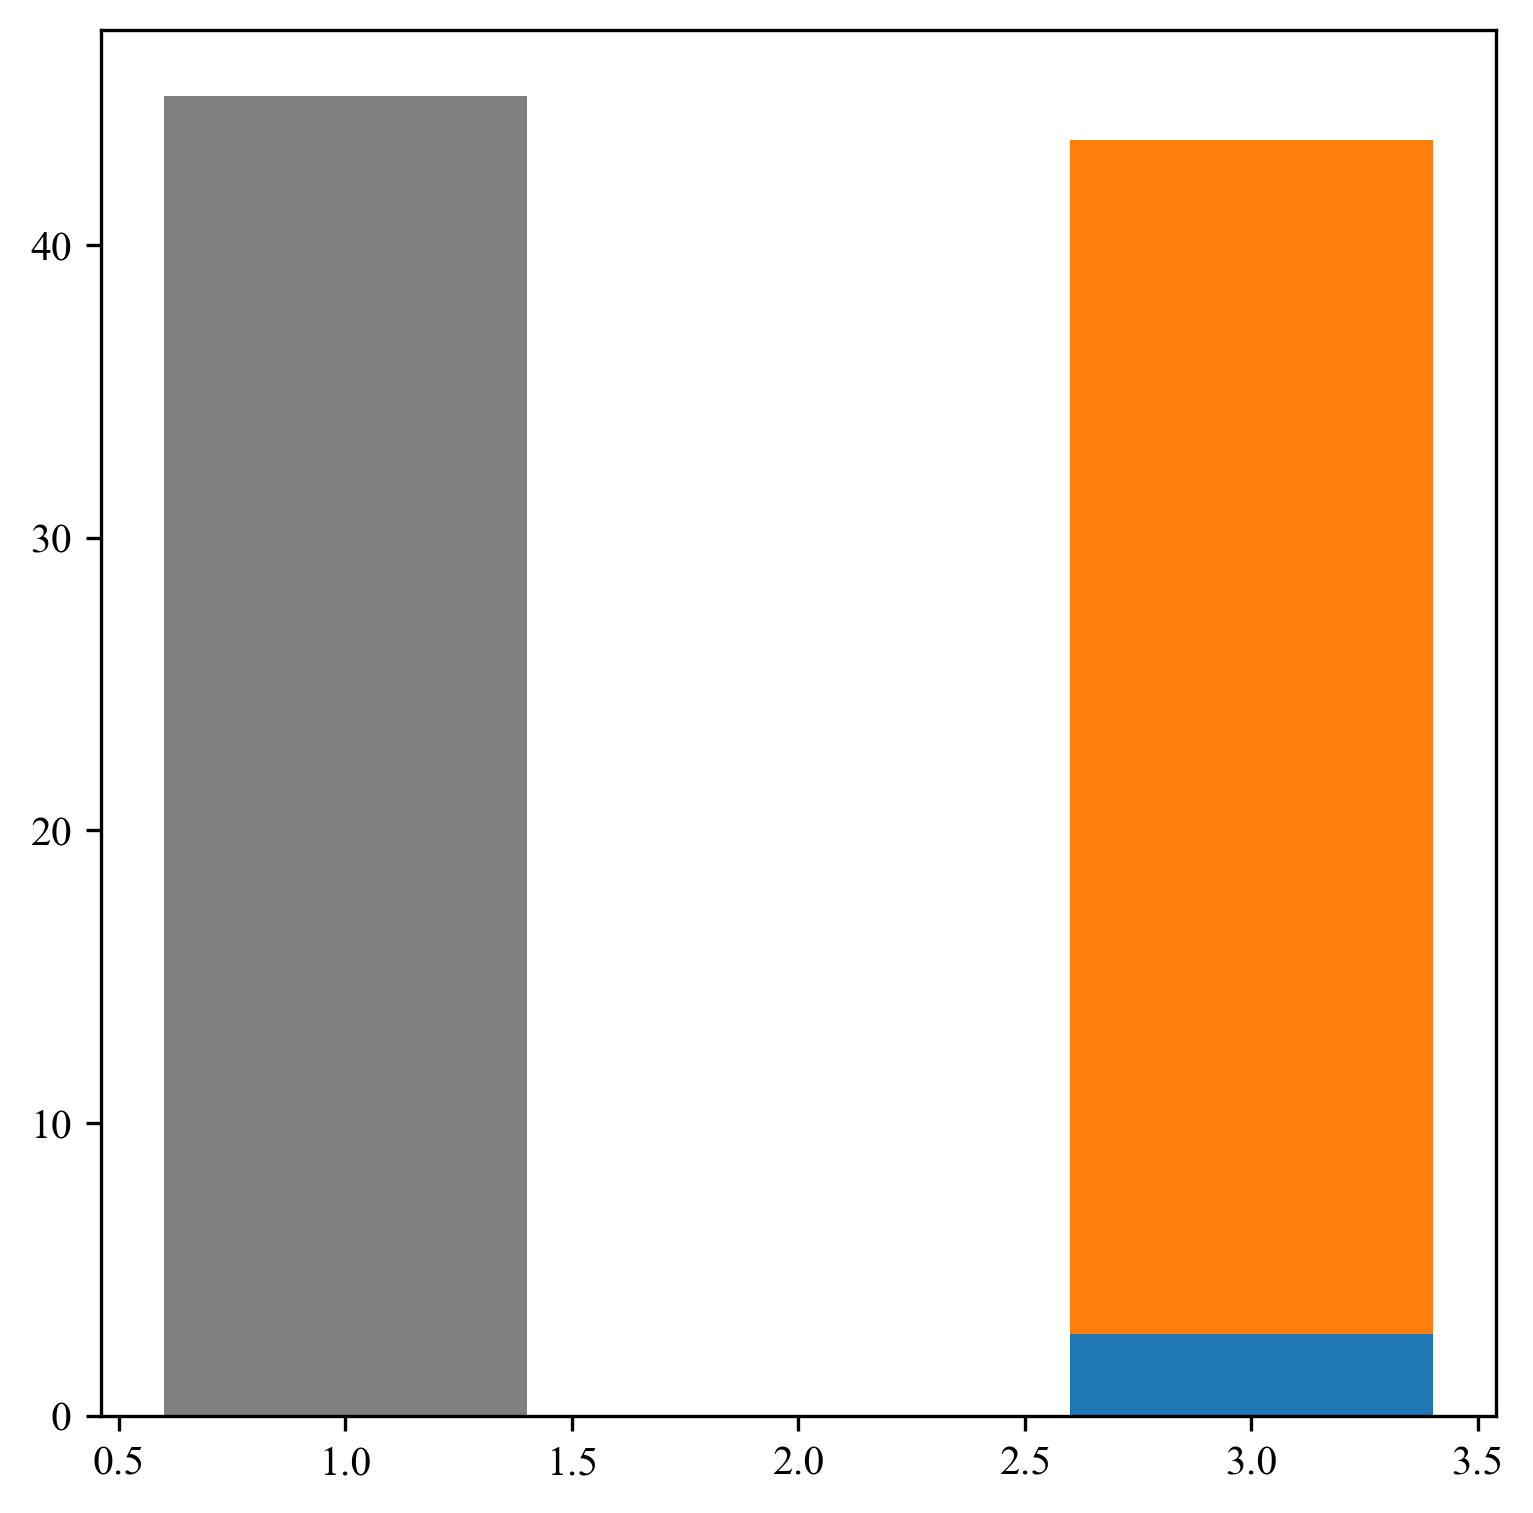

In [44]:
fig = plt.figure(figsize=(6, 6),dpi=300)
ax = fig.subplots(1,1)

ax.bar(3,sen_del_summer,color='tab:blue',label='ΔMET')
ax.bar(3,autumn_del_sen,color='tab:orange',label='ΔEMIS',bottom=sen_del_summer)
ax.bar(1,delta_obs,color='grey',label='ΔO$_3$')

plt.show()

## 将两张图拼接

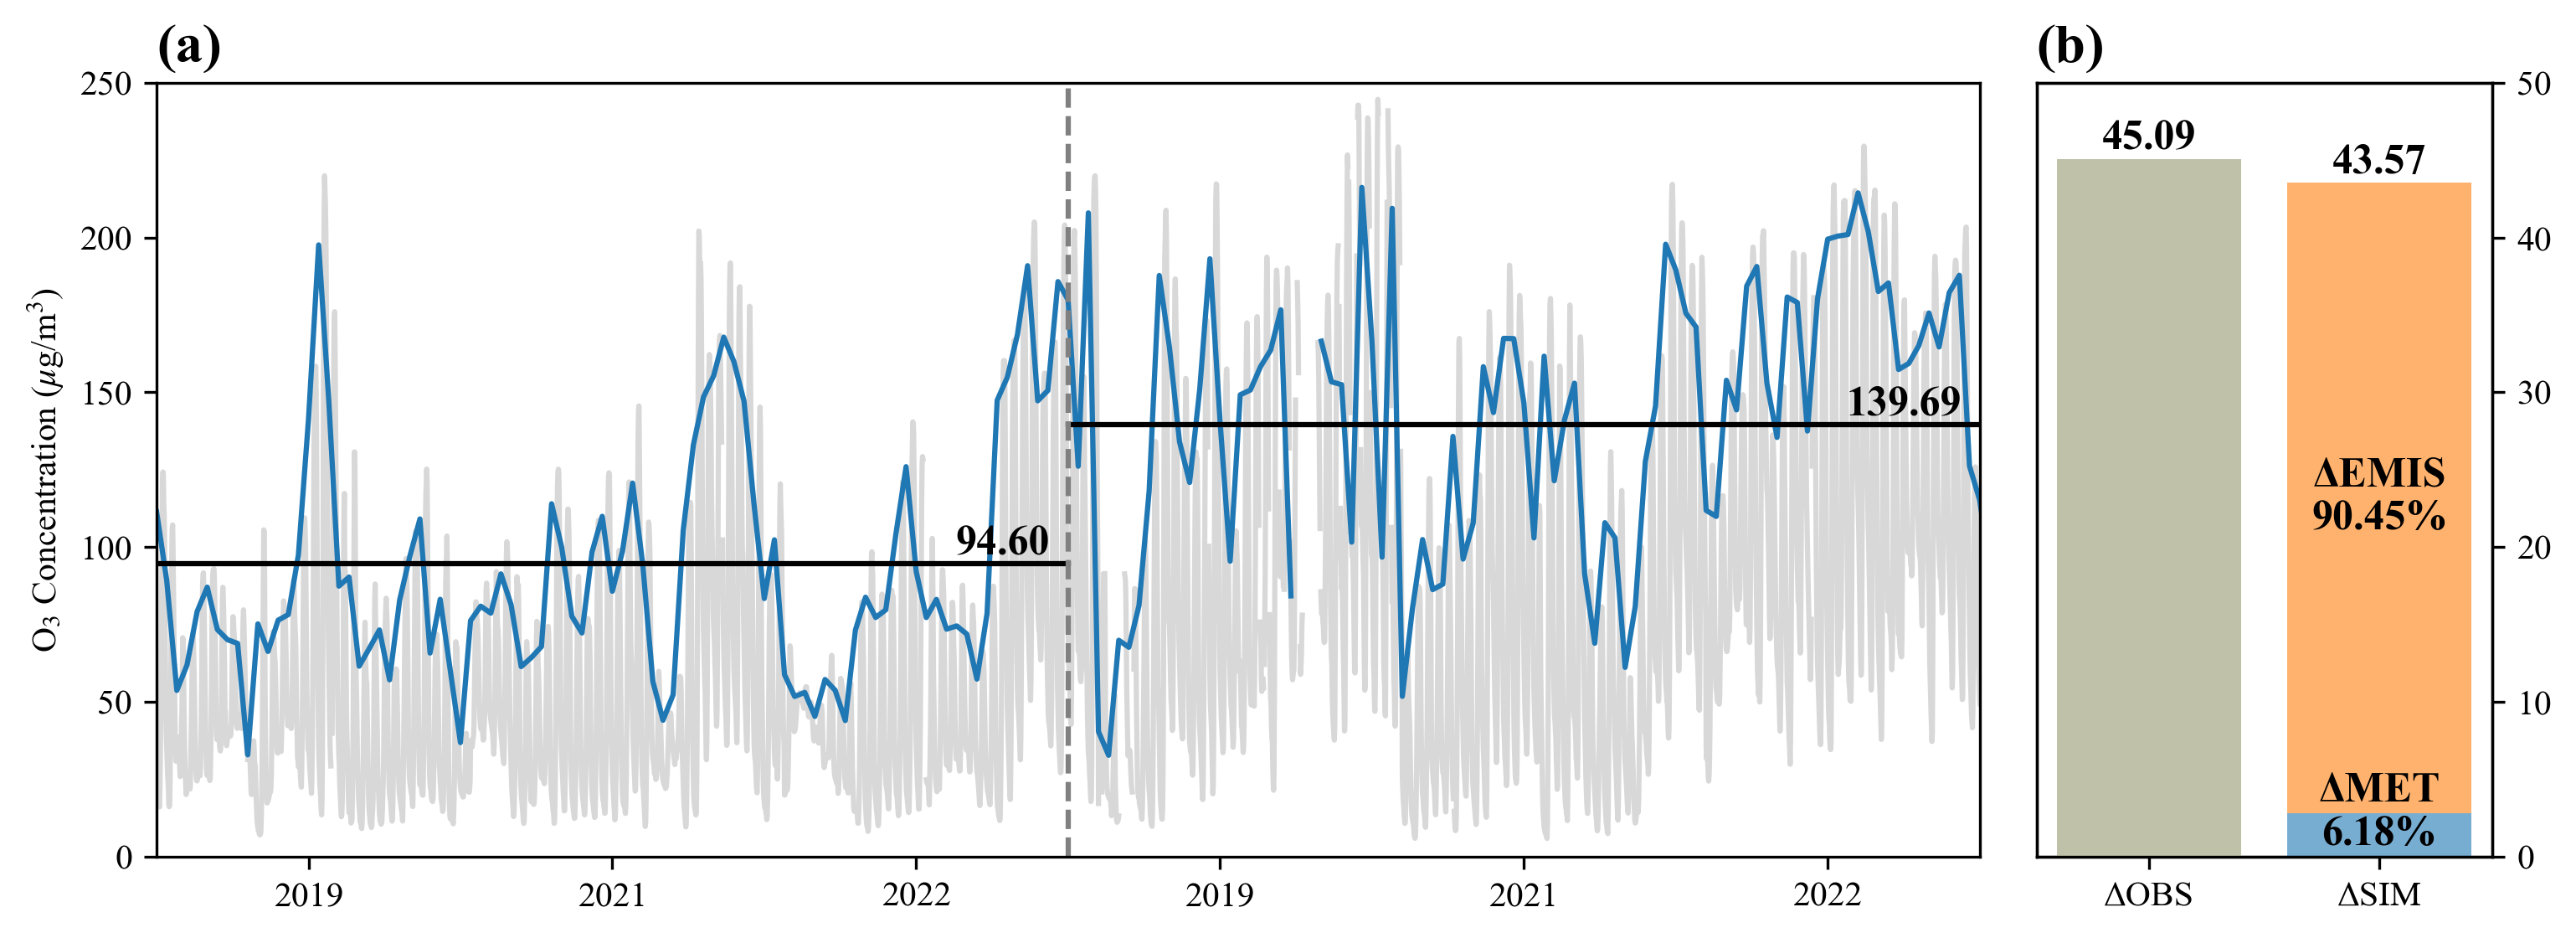

In [47]:
import matplotlib.gridspec as gridspec

# 第一幅图
hstep = np.arange(0, 4392, 1)
dstep = np.arange(0, 4392, 24)

fig = plt.figure(figsize=(12, 4), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])

ax1 = plt.subplot(gs[0])
ax1.plot(hstep, obs, color='gray', alpha=0.3)
ax1.plot(dstep, obs_mda8)
ax1.axhline(y=avg_mda8_summer, xmin=0, xmax=0.5, color='k')
ax1.axhline(y=avg_mda8_autumn, xmin=0.5, xmax=1, color='k')
ax1.axvline(x=2160, linestyle='--', color='gray')
textdict1 = {'weight': 'bold', 'size': 12, 'ha': 'right', 'va': 'bottom'}
ax1.text(0.49, obs_summer / 250, f'{avg_mda8_summer:.2f}', transform=ax1.transAxes, **textdict1)
ax1.text(0.99, obs_autumn / 250, f'{avg_mda8_autumn:.2f}', transform=ax1.transAxes, **textdict1)
ax1.set_xticks(np.arange(0, 4320, 24*30) + 24*30/2)
ax1.set_xticklabels([2019, 2021, 2022, 2019, 2021, 2022])
ax1.set_ylabel('O$_3$ Concentration ($\mu$g/m$^3$)')
ax1.set_xlim(0, 4320)
ax1.set_ylim(0, 250)
ax1.set_title('(a)',loc='left',fontsize=16,fontweight='bold')

# 第二幅图
ax2 = plt.subplot(gs[1])
ax2.set_yticks([])

ax3 = ax2.twinx()
ax3.bar(1, delta_obs, color='#bfc1a9', label='ΔO$_3',alpha=1)
ax3.bar(2, sen_del_summer, color='tab:blue', label='ΔMET',width=0.8,alpha=0.6)
ax3.bar(2, autumn_del_sen, color='tab:orange', label='ΔEMIS', bottom=sen_del_summer,width=0.8,alpha=0.6)

# 柱顶的值
textdict2 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'bottom'}
ax3.text(1,delta_obs, f'{delta_obs:.2f}',**textdict2)
ax3.text(2,sen_del_summer+autumn_del_sen, f'{sen_del_summer+autumn_del_sen:.2f}',**textdict2)

# 百分比值
textdict3 = {'weight': 'bold', 'size': 12, 'ha': 'center', 'va': 'center'}
ax3.text(2,sen_del_summer, f'ΔMET\n{sen_del_summer/delta_obs*100:.2f}%',**textdict3)
ax3.text(2,sen_del_summer+autumn_del_sen/2, f'ΔEMIS\n{autumn_del_sen/delta_obs*100:.2f}%',**textdict3)

ax3.set_xticks([1, 2])
ax3.set_xticklabels(['ΔOBS', 'ΔSIM'])
ax3.set_ylim(0, 50)
ax3.set_title('(b)',loc='left',fontsize=16,fontweight='bold')

plt.subplots_adjust(wspace=0.05)
plt.show()